#  Autocomplete TAB

In [1]:
%config Completer.use_jedi = False

#  Import libraries and load dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
kepesertaan = pd.read_csv('01_kepesertaan.txt', sep='|')

In [4]:
df = kepesertaan.copy()
df.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,15,15,1944-03-01,1,2,9,3,2,72,7206,3,1,72,7206,40.024914,2016,1,NaN
1,64,64,1971-12-10,1,2,2,3,3,76,7603,3,1,76,7603,36.453136,2016,1,NaN
2,101,101,1967-12-31,1,1,2,2,5,12,1273,9,2,12,1273,4.113659,2017,1,NaN
3,218,218,1961-01-30,1,2,3,3,2,18,1801,3,1,18,1801,22.901394,2016,1,NaN
4,340,70225684,1991-05-31,3,2,2,2,5,33,3311,9,2,33,3311,8.719338,2016,1,NaN


#  Exploratory Data Analysis

In [5]:
df.drop(index=1312440, inplace=True)

In [6]:
df['PSTV03'] = pd.to_datetime(df['PSTV03'])

In [7]:
# Determine Age of Participanti in 30 December 2020
des_2021 = pd.to_datetime('2020-12-30', format='%Y-%m-%d')
df['Age'] = (des_2021 - df['PSTV03']).astype('<m8[Y]')
df.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18,Age
0,15,15,1944-03-01,1,2,9,3,2,72,7206,3,1,72,7206,40.024914,2016,1,NaN,76.0
1,64,64,1971-12-10,1,2,2,3,3,76,7603,3,1,76,7603,36.453136,2016,1,NaN,49.0
2,101,101,1967-12-31,1,1,2,2,5,12,1273,9,2,12,1273,4.113659,2017,1,NaN,53.0
3,218,218,1961-01-30,1,2,3,3,2,18,1801,3,1,18,1801,22.901394,2016,1,NaN,59.0
4,340,70225684,1991-05-31,3,2,2,2,5,33,3311,9,2,33,3311,8.719338,2016,1,NaN,29.0


In [8]:
# Function for data info
def data_info(df):
    column  = []
    nunique = []
    null_val= []
    null_per= []
    dtype   = []
    for col in df.columns:
        column.append(col)
        nunique.append(df[col].nunique())
        null_val.append(df[col].isnull().sum())
        null_per.append((df[col].isnull().sum()/df[col].count())*100)
        dtype.append(df[col].dtypes)
    return pd.DataFrame({'Column': column, 'N-unique': nunique, 'Null Value': null_val, 'Null Percent': null_per, 'Dtype': dtype})

In [9]:
data_info(df)

,Column,N-unique,Null Value,Null Percent,Dtype
0,PSTV01,1971743,0,0.0000,int64
1,PSTV02,704887,0,0.0000,int64
2,PSTV03,34384,0,0.0000,datetime64[ns]
3,PSTV04,5,0,0.0000,int64
4,PSTV05,2,0,0.0000,int64
5,PSTV06,4,0,0.0000,int64
6,PSTV07,4,0,0.0000,int64
7,PSTV08,6,0,0.0000,int64
8,PSTV09,35,0,0.0000,int64
9,PSTV10,515,0,0.0000,int64


#  Data Visualization

## Univariate Analysis

In [10]:
# Pie Plot Function
def pie_plot(col):
    # Pie chart
    label = df[col].value_counts(sorted).index
    data  = df[col].value_counts(sorted).values
    fig1, ax1 = plt.subplots()
    ax1.pie(data, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.show()

In [11]:
#Pie Plot (Donut) Function
def donut_plot(col):
    # Pie chart
    label = df[col].value_counts(sorted).index
    data  = df[col].value_counts(sorted).values
    fig1, ax1 = plt.subplots()
    ax1.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
    
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()

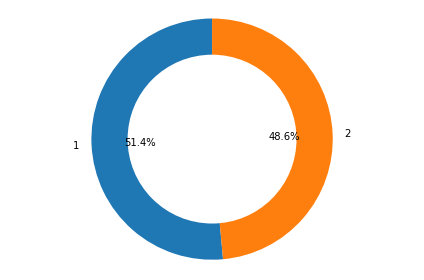

In [12]:
donut_plot('PSTV05')

1(man) and 2(woman), so there is more man than woman in this dataset

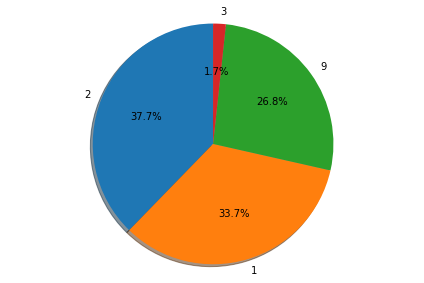

In [13]:
# Marital Status
pie_plot('PSTV06')

1(single), 2(married), 3(divorce), 4(undefined). So in this dataset the highest number of marital status is married

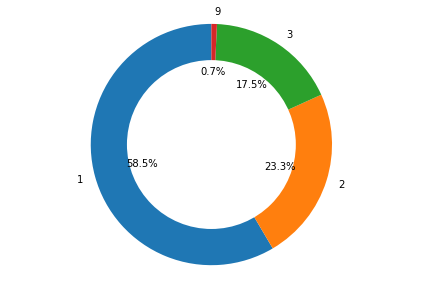

In [14]:
donut_plot('PSTV12')

1(Puskesmas), 2(Klinik Pratama) 3(Dokter Umum), 9(Missing). So the highest number of Type of health facilities is class Puskesmas

In [15]:
def count_plot(col, xlabel, title):
    plt.figure(figsize=(15,6))
    # Countplot
    aa = sns.countplot(x=col, data=df)
    # Plot style
    for aa_value in aa.patches:
        aa.annotate(format(aa_value.get_height(), '.0f'),
                    (aa_value.get_x() + aa_value.get_width() / 2., aa_value.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    # Plot label
    aa.set_xlabel(xlabel)
    aa.set_ylabel('Count')
    aa.set_title(title);

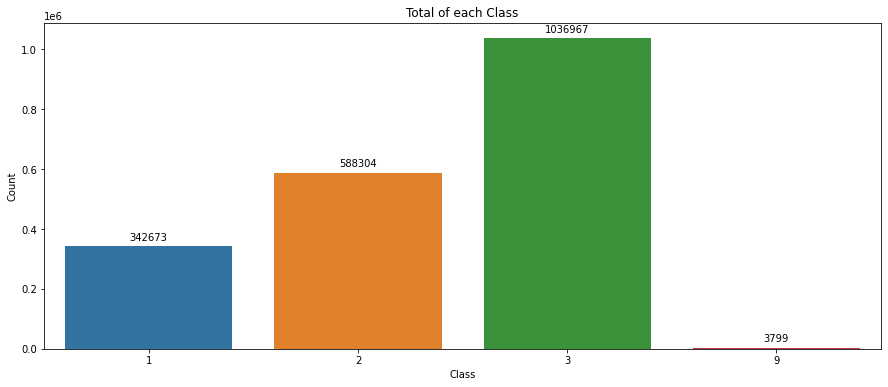

In [16]:
count_plot('PSTV07', 'Class', 'Total of each Class')

1(Class 1), 2(Class 2), 3(Class 3), 9(Missing). So the highest number of class participation is class 3

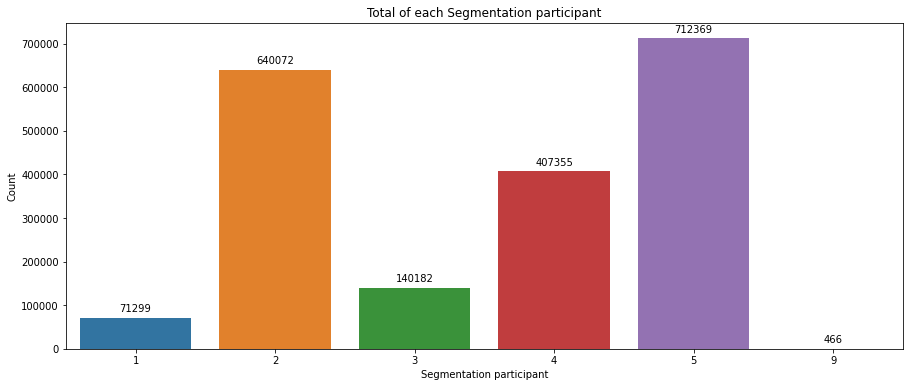

In [17]:
count_plot('PSTV08', 'Segmentation participant', 'Total of each Segmentation participant')

1(Non-worker), 2(PBI APBN), 3(PBI APBD), 4(PBPU), 5(PPU), 9(Missing). So the highest number of segementation participant is PPU

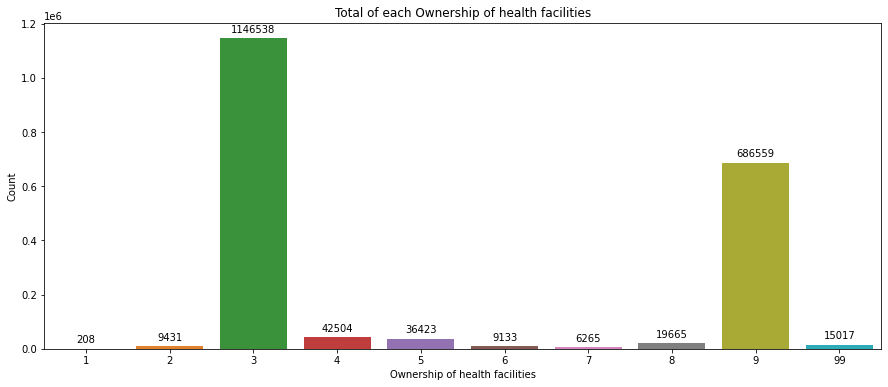

In [18]:
count_plot('PSTV11', 'Ownership of health facilities', 'Total of each Ownership of health facilities')

1(Vertical/central), 2(province), 3(city), 4(POLRI), 5(TNI AD), 6(TNI AL), 7(TNI AU), 8(BUMN), 9(SWASTA), 99(Missing). So the highest number of ownership of health facilities is Government City

<AxesSubplot:xlabel='Age', ylabel='Count'>

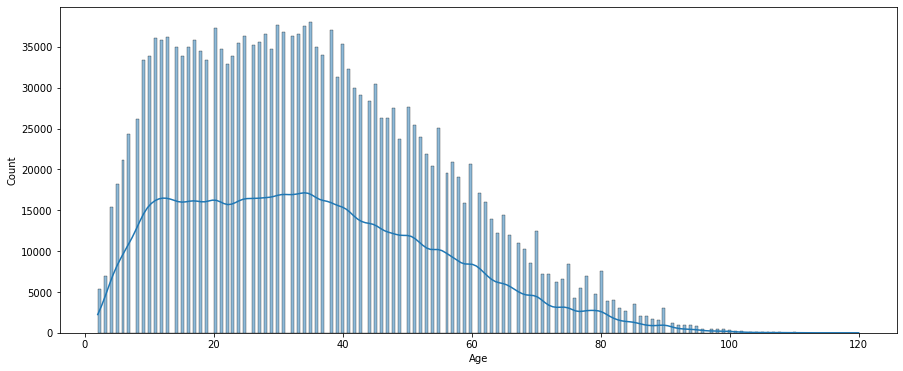

In [19]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x="Age", kde=True)

## Bivariate Analysis

In [20]:
df.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18,Age
0,15,15,1944-03-01,1,2,9,3,2,72,7206,3,1,72,7206,40.024914,2016,1,NaN,76.0
1,64,64,1971-12-10,1,2,2,3,3,76,7603,3,1,76,7603,36.453136,2016,1,NaN,49.0
2,101,101,1967-12-31,1,1,2,2,5,12,1273,9,2,12,1273,4.113659,2017,1,NaN,53.0
3,218,218,1961-01-30,1,2,3,3,2,18,1801,3,1,18,1801,22.901394,2016,1,NaN,59.0
4,340,70225684,1991-05-31,3,2,2,2,5,33,3311,9,2,33,3311,8.719338,2016,1,NaN,29.0


In [21]:
def biv_count_plot(col, hue, xlabel, title):
    plt.figure(figsize=(15,6))
    # Countplot
    aa = sns.countplot(x=col, hue=hue, data=df)
    # Plot style
    for aa_value in aa.patches:
        aa.annotate(format(aa_value.get_height(), '.0f'),
                    (aa_value.get_x() + aa_value.get_width() / 2., aa_value.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    # Plot label
    aa.set_xlabel(xlabel)
    aa.set_ylabel('Count')
    aa.set_title(title);

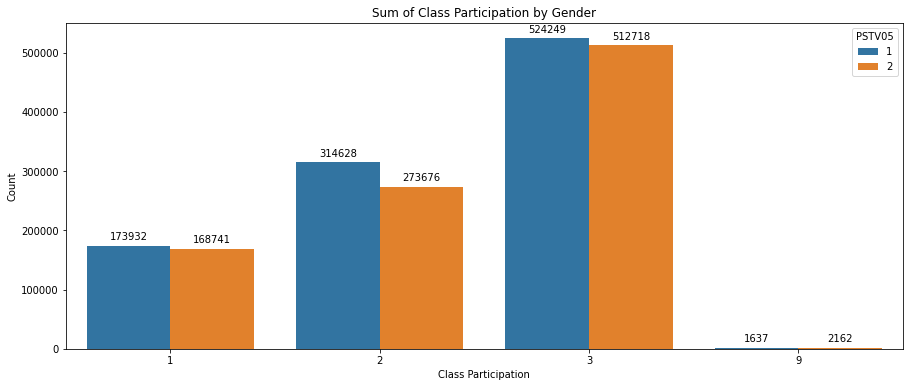

In [22]:
biv_count_plot('PSTV07', 'PSTV05', 'Class Participation', 'Sum of Class Participation by Gender')

In [23]:
def one_box_plot (x, y):
    plt.figure(figsize=(15,6))
    sns.boxplot(data = df, x=x, y=y);
    
def one_violin_plot (x, y):
    plt.figure(figsize=(15,6))
    sns.violinplot(data = df, x=x, y=y);

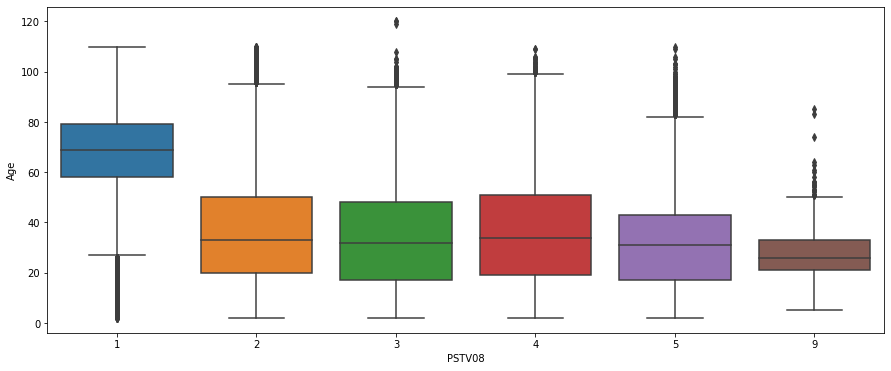

In [24]:
one_box_plot('PSTV08', 'Age')

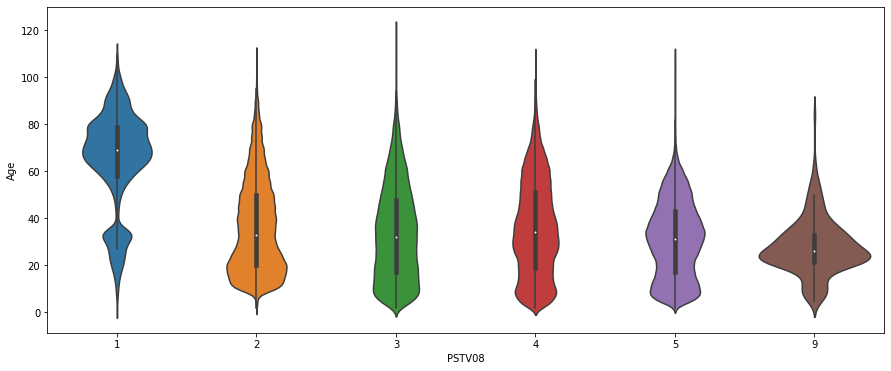

In [25]:
one_violin_plot('PSTV08', 'Age')

# Multivariate Analysis

In [26]:
def bi_violin_plot (x, y, hue):
    plt.subplots(figsize=(15, 6))
    sns.violinplot(x=x, y=y, hue=hue, kind="violin", split=True, data=df);

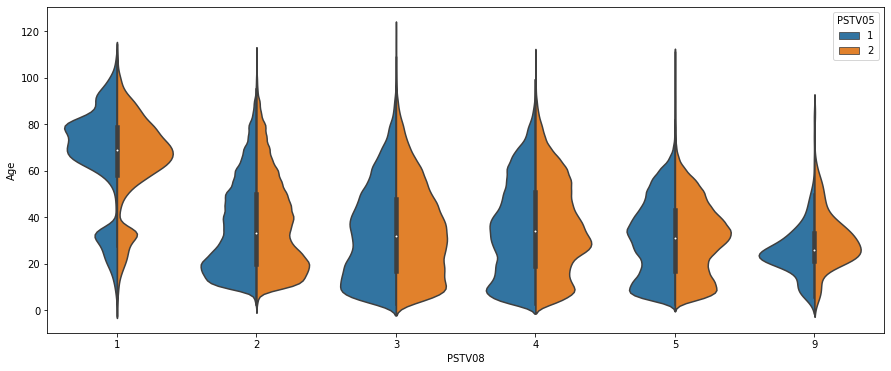

In [27]:
bi_violin_plot('PSTV08', 'Age', 'PSTV05')

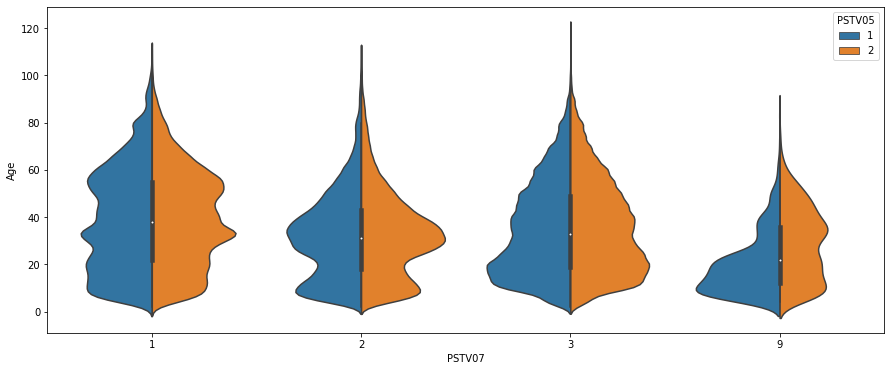

In [28]:
bi_violin_plot('PSTV07', 'Age', 'PSTV05')